**November 15, 2018**  
**ATMOS 5020: Environmental Programming**  
**John Horel & Brian Blaylock**  


# Python Input-Output (I/O) Methods
**Objective**: Reinforce concepts related to input operations and using numpy to manipulate arrays.

The last two classes focused on visualizing results, which is critical for any programming application
in environmental fields. We have given you data in a format that is easily used. You won't always be so luck and data will come in a not-so-easy-to-use format. In today's class, we will spend a bit of time introducing ways to input information into a program and using numpy to handle arrays.

---

# Interactive Data Input

First, let's manually enter values interactively

In [1]:
# Ask for user input
my_name = input("What is my name?")

What is my name? John


In [2]:
#so what is the value of my_name?
my_name

'John'

> Note: The value returned from the `input` function is _always a string_. If we want it to be a different data type, such as an integer or float, We have to convert it to that type.


In [3]:
# Change the input to an integer type
my_address = int(input("what is my street address?"))

what is my street address? 1234


In [4]:
#so what is my address
my_address

1234

In [5]:
#what type is my_address?
type(my_address)

int

In [6]:
# or check the object type this way...
my_address?

Type:        int
String form: 1234
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


Interactively inputting information is not only cumbersome, Python won't continue through the code unless a value is entered. There are better ways to input data when we need to load lots of data at the same time, such as from a text file or file.

---

# Download text from a URL

We can access tons of information directly from the web and load that data into Python.

Obviously, there are many different ways to access that data. Some methods are more than others appropriate depending on the situation and data type. Some methods are easy and some are hard. There are shortcuts, which may or may not work depending on the data you work with.

## Wyoming Sounding Data

<img src="./images/sounding.gif" width=400>

One resource to get weather data is a Wyoming web site that provides observations made from rawinsondes of the vertical distribution of wind, tempeature, and moisure with height at hundreds of locations across the world. This data is otherwise known as a **sounding**.

Take a look at http://weather.uwyo.edu/upperair/sounding.html and click on SLC.

You will see an HTML file with data for different weather variables at different levels:

http://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=11&FROM=1112&TO=1112&STNM=72572

## Download file with [`urllib.request`](https://docs.python.org/3/library/urllib.request.html#legacy-interface)

We want to load this data into Python and plot it. The biggest tast before us is to load the data and then structure the data in a way we can use it. There are several ways this could be done, but let's start with the basics. We will use `urllib` to download the data from online. 

`urllib` is a library for interacting with data on the web. Specifically the `urllib.request` submodule contains the function `urlretrieve` that retrieves web content. Let's load the sounding data...

> Other modules you may consider using for retrieving online content is `urllib3` and `requests` and `json`. 

Reference: [`urllib.request` documentation](https://docs.python.org/3/library/urllib.request.html)

In [7]:
from urllib.request import urlretrieve

# We will use numpy and matplotlib later, but lets import it now
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Define a string that points to the web content URL. 
# There are ways to concatenate variables to generate a string, but let's not bother with that today.
url_string = "http://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=11&FROM=1112&TO=1112&STNM=72572"

# urlretrieve will save the content at the URL to the file "slc_snd.txt"
file_name, headers = urlretrieve(url_string, "slc_snd.txt")

## Questions: 
- What is the content of the variables `file_name` and `headers`?
- What is `headers.keys()`? This is a dictionary of data related to the data and network connection.
- Did you obtain a file in your local directory named `slc_snd.txt`?
- What is in the `slc_snd.txt` file? Look at its contents.

## Open the file

Use the built-in Python function `open('filename')`. The option `'r'`, shown in the next cell, means the text file is open to "read only". Other options include:

|open code|open type|
|--|--|
|`'r'`| file is open to read only
|`'w'`| file is open to write only
|`'w+'`| output will overwrite the existing content in the file
|`'a'`| output will be appended to the end of an existing file
|`'b'`| indicates the file content is binary

In [9]:
# Open that file as an object:
snd_file = open('slc_snd.txt', 'r')

In [10]:
# to close the file object:
snd_file.close()

Let's open the file again and read all the content into a list. Use the `with` keyword to open the file. The advantage of this is that the file object executes the statements in the code block and then automatically closes the file object when the block is finished.

In [11]:
# Read the file contents
with open('slc_snd.txt','r') as file:
    contents = file.readlines()

# Print the data we loaded
print('shape:,', np.shape(contents))
contents

# This look like what we saw in the browser. That is good.

shape:, (192,)


['<HTML>\n',
 '<TITLE>University of Wyoming - Radiosonde Data</TITLE>\n',
 '<LINK REL="StyleSheet" HREF="/resources/select.css" TYPE="text/css">\n',
 '<BODY BGCOLOR="white">\n',
 '<H2>72572 SLC Salt Lake City Observations at 12Z 11 Nov 2018</H2>\n',
 '<PRE>\n',
 '-----------------------------------------------------------------------------\n',
 '   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV\n',
 '    hPa     m      C      C      %    g/kg    deg   knot     K      K      K \n',
 '-----------------------------------------------------------------------------\n',
 ' 1000.0    185                                                               \n',
 '  925.0    830                                                               \n',
 '  875.0   1289    0.4   -4.2     71   3.22    330      5  284.2  293.5  284.7\n',
 '  854.0   1480   -1.1   -5.9     70   2.89    305      7  284.6  293.1  285.1\n',
 '  850.0   1517   -1.1   -6.1     69   2.86    300      7  285.0 

That looks ugly, and we can't plot this data yet. Notice the pesky header and footer information and the end-of-line character, `\n` at the end of every line. We don't want that stuff. 

Reading data into Python so that it is easy to work with will be a puzzle you solve many times, and you will find there are many methods to do this.

## One Method: Split each item in the list and store value in new list
We need to split the content of each line to remove the '\n' character. There are many ways to do that, but here is one method we can do that...

In [12]:
# Test the method in this cell, see what is happening

# Split a sentence by the \n character...
a = 'this is a sentence\nthat is split by a new line character'
print(a.split('\n'))

# Do you see that the last item is empty! We only want to get the first item of this list
b = 'this is a sentence where the new line is at the end\n'
print(b.split('\n'))

# only get the first item in the new list...
b.split('\n')[0] # <-- This is what we want from each line!!!

['this is a sentence', 'that is split by a new line character']
['this is a sentence where the new line is at the end', '']


'this is a sentence where the new line is at the end'

Ok, so lets do that same thing while reading each line and store it in a new list.

In [13]:
# Create an empty list
Contents = []

# loop over the whole file and append to the Contents list
with open('slc_snd.txt','r') as file:
    #operate on each line of the open file
    for line in file:
        # Append the lines in sequence to the list Contents, only using the 0th item of the split list
        Contents.append(line.split('\n')[0])

print('shape:', np.shape(Contents))
Contents

shape: (192,)


['<HTML>',
 '<TITLE>University of Wyoming - Radiosonde Data</TITLE>',
 '<LINK REL="StyleSheet" HREF="/resources/select.css" TYPE="text/css">',
 '<BODY BGCOLOR="white">',
 '<H2>72572 SLC Salt Lake City Observations at 12Z 11 Nov 2018</H2>',
 '<PRE>',
 '-----------------------------------------------------------------------------',
 '   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV',
 '    hPa     m      C      C      %    g/kg    deg   knot     K      K      K ',
 '-----------------------------------------------------------------------------',
 ' 1000.0    185                                                               ',
 '  925.0    830                                                               ',
 '  875.0   1289    0.4   -4.2     71   3.22    330      5  284.2  293.5  284.7',
 '  854.0   1480   -1.1   -5.9     70   2.89    305      7  284.6  293.1  285.1',
 '  850.0   1517   -1.1   -6.1     69   2.86    300      7  285.0  293.4  285.5',
 '  820.0   

That is much better...we have one list, with size of 192, where each item in the list is the contents of the line _and we removed the pesky new line character_.

### Split line contents and convert to floats
If we want to take a line of the file and convert all the values to floats, we could do...

In [14]:
# Get a single line of data (the 15th line)
val = Contents[15]

# Split the string (don't specify a delimiter and Python will split by white space)
split_val = val.split()
print(split_val)

# This results in a bunch of strings...

['820.0', '1803', '-2.3', '-6.4', '73', '2.90', '36', '1', '286.6', '295.2', '287.2']


In [15]:
# Convert each of those values to floats (2 methods)

# A brute-force way to convert those strings to float values, with a list comprehension
print('Convert to float with list comprehension:')
values = [float(i) for i in split_val]
print(values)

# Alternative way with numpy
print('\nAlternative method with numpy array:')
values2 = np.array(split_val, dtype=float)
print(values2)

Convert to float with list comprehension:
[820.0, 1803.0, -2.3, -6.4, 73.0, 2.9, 36.0, 1.0, 286.6, 295.2, 287.2]

Alternative method with numpy array:
[ 8.200e+02  1.803e+03 -2.300e+00 -6.400e+00  7.300e+01  2.900e+00
  3.600e+01  1.000e+00  2.866e+02  2.952e+02  2.872e+02]


## Data Manipulation with NumPy
NumPy functions can be used to make things a little easier. We will use two different approaches for this case

### NumPy pluck-and-store value method

In [16]:
# Repeat reading the file like we did before

# Create an empty list
Contents = []
# loop over the whole file
with open('slc_snd.txt','r') as file:
    #operate on each line
    for line in file:
        #append the lines in sequence to the list Contents
        Contents.append(line.split('\n')[0])

In [17]:
#To focus on the data of interest, we will skip over the first 12 header rows and 
# arbitrarily decide to grab the next 100 rows, so that we don't get any of the footer data.
data100 = np.array(Contents[12:112])
print(data100)

['  875.0   1289    0.4   -4.2     71   3.22    330      5  284.2  293.5  284.7'
 '  854.0   1480   -1.1   -5.9     70   2.89    305      7  284.6  293.1  285.1'
 '  850.0   1517   -1.1   -6.1     69   2.86    300      7  285.0  293.4  285.5'
 '  820.0   1803   -2.3   -6.4     73   2.90     36      1  286.6  295.2  287.2'
 '  817.3   1829   -2.4   -6.7     72   2.84     45      1  286.8  295.2  287.3'
 '  794.0   2058   -3.5   -9.5     63   2.35    338      8  288.0  295.1  288.4'
 '  786.3   2134   -4.2   -9.8     65   2.32    315     10  288.1  295.1  288.5'
 '  756.2   2438   -6.8  -11.2     71   2.17    320     13  288.5  295.1  288.9'
 '  727.1   2743   -9.4  -12.5     78   2.02    330     16  288.9  295.1  289.3'
 '  700.0   3039  -11.9  -13.8     86   1.89    345     12  289.3  295.1  289.6'
 '  681.0   3249  -13.7  -15.0     90   1.76    345     12  289.6  295.0  289.9'
 '  669.0   3384  -14.5  -17.1     81   1.50    345     13  290.1  294.8  290.4'
 '  645.1   3658  -16.9  -19

This looks clean. The content we have is a list of lengthy strings that contain our data.

### Question?
How many data columns are there in the file? Look at the file `slc_snd.txt` and take a look.

There are 11 columns. Let's create an array of zeros that we can store our data into as we convert it from strings to floats.

In [18]:
# Number of rows in our data of interest
rows = np.shape(data100)[0]

# Create a 2-D array of size rows by 11 columns that we will store our sounding values in
snd_vals = np.zeros((rows, 11))
print(snd_vals)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
# look at the diference in information returned using the `size` vs `shape` function
np.size(snd_vals)

1100

In [20]:
np.shape(snd_vals)

(100, 11)

Now `snd_vals` is just a 2-d array of size 100 x 11 filled with zeros.

The next step is to actually _put data into that array_...

We now introduce you to a new handy numpy function...`arange()` is similar to the Python's built-in `range()` function, but the output is a NumPy array instead of a list. (It also allows for fractional step incraments).

In [21]:
# try the following
a = np.arange(5)
print(a)
b = np.arange(10,-1,-1)
print(b)

[0 1 2 3 4]
[10  9  8  7  6  5  4  3  2  1  0]


Ok, let's loop through all the rows and grab the data...

Ugh. You will see why dealing with I/O can be a hassle and that there are many, many ways to do the same thing!
1. For all rows...
1. Skip over the first 12 header rows of `Contents`.
1. This time, use `np.fromstring` to split the values
    - Convert to floats with `dtype` argument.
    - Separate the values by whitespace with the `sep` argument.
1. For each converted row of values, put that row into our new `snd_vals` array, replacing the zeros that are currently there.

In [22]:
# Use the arange function to loop over 100 rows
for i in np.arange(rows):
    # Skip 12 header rows and split the values into floats.
    val= np.fromstring(Contents[i+12], dtype=float, sep=' ' )
    # For the ith row of converted values, put the converted values into the ith row of the snd_vals storage array.
    snd_vals[i,:]=val[:]

# What did we get?
print(snd_vals)

[[ 8.750e+02  1.289e+03  4.000e-01 ...  2.842e+02  2.935e+02  2.847e+02]
 [ 8.540e+02  1.480e+03 -1.100e+00 ...  2.846e+02  2.931e+02  2.851e+02]
 [ 8.500e+02  1.517e+03 -1.100e+00 ...  2.850e+02  2.934e+02  2.855e+02]
 ...
 [ 3.820e+01  2.221e+04 -5.830e+01 ...  5.461e+02  5.461e+02  5.461e+02]
 [ 3.580e+01  2.262e+04 -5.550e+01 ...  5.635e+02  5.636e+02  5.636e+02]
 [ 3.450e+01  2.286e+04 -5.570e+01 ...  5.691e+02  5.692e+02  5.691e+02]]


In [23]:
# What is the shape of snd_vals again?
np.shape(snd_vals)

(100, 11)

In [24]:
# What is in the first row?
snd_vals[0]

array([ 8.750e+02,  1.289e+03,  4.000e-01, -4.200e+00,  7.100e+01,
        3.220e+00,  3.300e+02,  5.000e+00,  2.842e+02,  2.935e+02,
        2.847e+02])

### Yea! This is the format we want the data in 👍🏻
_...that was painful_

> **Custom Functions**: This example of loading sounding data demonstartes the importance of learning how to write your own functions! Reading sounding data is often repeated, and you won't want to recode this again now that you figured out out how to do it. When you get the data in the format way you want it, put those statements in a function and save it in a `.py` file so you can use it later. FYI: you can import functions from python scripts such as `from my_script import my_function`.

---
# Plot Sounding Data

## Accessing variable data from the 2D array

Remember that indexing & slicing in NumPy differs from regular Python
- **Python**: `[i][j]`
- **NumPy**: `[i,j]`

Where `i` is the row and `j` is the column.

### Question
What values are stored in each column? Lets, Look at the values on the _second row_ (a.k.a. the 1st row).

In [25]:
# The first column (0th column) holds the pressures in hPa
print(snd_vals[1,0])

# the second column (1st column) holds the height in meters
print(snd_vals[1,1])

# the third column (2nd column) has the temperatures in Celsius
print(snd_vals[1,2])


854.0
1480.0
-1.1


Now, let's plot up some of what is in the `snd_vals` array. Remember the plotting tools we learned previously...

Temperature: All rows `:` in the 2nd column
    
    snd_vals[:,2]
    
Height: All rows `:` in the 1st column

    snd_vals[:,1]

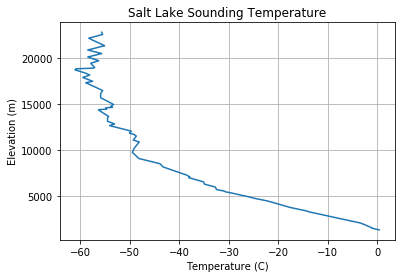

In [26]:
# plot the temperature on the x axis as a function of height on the y axis
import matplotlib.pyplot as plt

plt.plot(snd_vals[:,2], snd_vals[:,1])
plt.xlabel('Temperature (C)')
plt.ylabel('Elevation (m)')
plt.title('Salt Lake Sounding Temperature')
plt.grid()

# Now, we're making something that's useful!

---
# Other methods for converting text files...

There are always easier ways to do things. Converting from strings to floats can be a hassle.

### Read  file using `np.genfromtxt()`
In this instance, since the data is fairly regular and doesn't include any strings, the numpy `genfromtxt` function would make it really easy!

There are plenty of gotchas hidden in this...In this case, the delimiter between data is any whitespace so it doesn't need to be specified. We also need to use the `skip_header` and `skip_footer` argument.

In [27]:
# Load data we previously downloaded
slc_snd = np.genfromtxt('slc_snd.txt', skip_header=12, skip_footer=60)

#print out entire array and make sure it looks good...
print(slc_snd)

[[ 8.7500e+02  1.2890e+03  4.0000e-01 ...  2.8420e+02  2.9350e+02
   2.8470e+02]
 [ 8.5400e+02  1.4800e+03 -1.1000e+00 ...  2.8460e+02  2.9310e+02
   2.8510e+02]
 [ 8.5000e+02  1.5170e+03 -1.1000e+00 ...  2.8500e+02  2.9340e+02
   2.8550e+02]
 ...
 [ 1.2500e+01  2.9316e+04 -5.8100e+01 ...  7.5210e+02  7.5220e+02
   7.5210e+02]
 [ 1.1500e+01  2.9846e+04 -5.3900e+01 ...  7.8530e+02  7.8550e+02
   7.8530e+02]
 [ 1.0600e+01  3.0368e+04 -5.4100e+01 ...  8.0300e+02  8.0330e+02
   8.0310e+02]]


In [28]:
# Print the shape
# NOTE: The number of columns for the array was determined by the first row it read
np.shape(slc_snd)

(119, 11)

### Question

Try removing  the skip header and footer options and see if it still works. 

    slc_snd_nohf = np.genfromtxt('slc_snd.txt')

What happened? Mixing data arbitrarily in with other content can make things complicated

## Plot Wind Speed vs. Pressure
Always check the file to know the units the data is in so you can correctly label your plot.

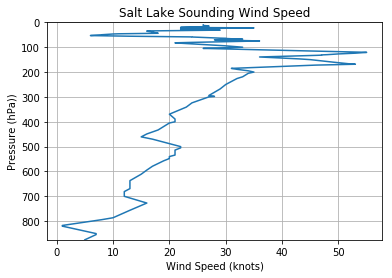

In [29]:
# plot the pressure in column 0 on the y axis and wind speed on the x axis
plt.plot(slc_snd[:,7], slc_snd[:,0])
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Pressure (hPa))')
plt.title('Salt Lake Sounding Wind Speed')
plt.grid()

# We want the figure to show that pressure decrease with height
plt.ylim([875,0]);

# Alternativley...
#plt.gca().invert_yaxis()

# Exercise #1

Plot potential temperature (thta) vs. height

### Download and read data with `requests` module
Using a differnet module to download the data, then split the text and conver the data, all condensed into three lines.

In [30]:
import requests
content = requests.get(url_string).text.split('\n')
DATA = np.array([i.split() for i in content[12:119]], dtype=float)
print(DATA)

[[ 8.7500e+02  1.2890e+03  4.0000e-01 ...  2.8420e+02  2.9350e+02
   2.8470e+02]
 [ 8.5400e+02  1.4800e+03 -1.1000e+00 ...  2.8460e+02  2.9310e+02
   2.8510e+02]
 [ 8.5000e+02  1.5170e+03 -1.1000e+00 ...  2.8500e+02  2.9340e+02
   2.8550e+02]
 ...
 [ 2.7400e+01  2.4321e+04 -5.3100e+01 ...  6.1500e+02  6.1510e+02
   6.1500e+02]
 [ 2.7100e+01  2.4384e+04 -5.3300e+01 ...  6.1610e+02  6.1620e+02
   6.1610e+02]
 [ 2.5900e+01  2.4689e+04 -5.4300e+01 ...  6.2170e+02  6.2180e+02
   6.2170e+02]]


# Short detour: chemistry application
# Irreversible first order reaction simulation

Irreversible first order reactions are perhaps the most common type of kinetic situations. The general form of these reactions is the following:

$$A \rightarrow B$$

The rate of change in the concentrations of each species in this system ([A] and [B]) is defined by a series of ordinary differential equations (ODEs). 

$$ \frac{d[A]}{dt} = -k[A] $$
$$ \frac{d[B]}{dt} = k[A] $$

Where $k$ is the forward rate constant for the given reaction. For these simple systems, analytical solutions to these equations are easily derived and can be found in any introductory chemistry text or [on the web]. For example, the integrated rate law for a first order reaction is as follows:

$$ [A] = [A]_{0}e^{-kt} $$

Where $[A]_0$ is the initial concentration of compound *A*. 

In the example below, we are going to fit some simulated first order kinetic data using traditional fitting techniques with the analytical solution above and with the module *odenlls*, which fits the kinetic data using numerical simulations of the reaction ODEs.

To start, we'll need to import some extra modules.

[on the web]: https://chem.libretexts.org/Core/Physical_and_Theoretical_Chemistry/Kinetics/Reaction_Rates/First-Order_Reactions

In [31]:
## Analytical Solutions

#Let's define a function that caculates our first order analytical solution. 

def first_order(times, c_A0, k1):
    return c_A0*np.exp(-k1*times)

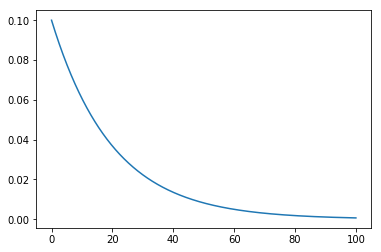

In [32]:
#Let's simulate this function to get a sense of how the data should look.

times = np.linspace(0, 100, 1000)
A0 = 0.1 # Initial concentration
k = 0.05 # rate constant
A = first_order(times, A0, k) # Concentrations of A at any time
plt.plot(times, A)

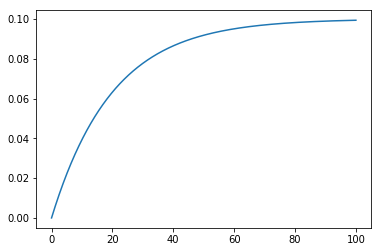

In [33]:
#In order to simulate the behavior of the product, we must define a second analytical equation.

def first_order_back(times, c_A0, k1):
    return c_A0*(1 - np.exp(-k1*times))

B = first_order_back(times, A0, k)
plt.plot(times, B)

---
---

# Reviewing NumPy basics

---

## Creation of 1D arrays

There are several options to create a 1D numpy arrays:

|Function|Description|
|--|--|
|`numpy.array()` | create an numpy array from a python array-like object, such as a list
|`numpy.arange(start, [stop], [step], dtype=None)` | return evenly spaced values with given interval
|`numpy.linspace(start, stop, num=50, endpoint=True)` | return evenly spaced numbers over a specified interval.

In [34]:
# For example, here are a couple of ways to create values over the interval [0,1] with equidistant intervals 
# where intervals is given by (b-a)/dx
a=np.linspace(0,1,11)   
print("a := np.linspace(0,1,11):\n{0}\n".format(a))

# What does the endpoint argument do?
b=np.linspace(0,1,10,endpoint=False) 
print("b := np.linspace(0,1,10,endpoint=False):\n{0}\n".format(b))

a := np.linspace(0,1,11):
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

b := np.linspace(0,1,10,endpoint=False):
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]



---

## Multi-dimensional arrays and `np.reshape`
There are a bunch of ways to create numpy arrays of different sizes.
- `numpy.array`: create an numpy array from a python array-like object (as in the 1D case)
- `numpy.reshape(a, newshape[,order])`
    - gives a new shape (dimensionality) to an array without changing its data
    - newshape argument is a tuple, i.e. (5, 10) for a 5x10 array.
    - order: 'F', 'C'
        - 'C': C-order => row-order (Default)
        - 'F': Fortran-order => column-order
- `numpy.meshgrid(a,b)`: returns coordinate matrices from two or more 1D coordinate vectors. Very useful for plotting gridded data.

In [35]:
# Numpy-array from 2D List
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print("a := np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]]) :\n{0}\n".format(a))

# Reshape
b = np.arange(1,13).reshape(3,4)
print("b := np.arange(1,13).reshape(3,4) :\n{0}\n".format(b))

a := np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]]) :
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

b := np.arange(1,13).reshape(3,4) :
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]



In [36]:
a = np.array([[1,2,3],[4,5,6]])
print("a := np.array([[1,2,3],[4,5,6]]) :\n{0}\n".format(a))

# Row-order (C)
b1 = np.reshape(a,(1,6))
print("b1:= np.reshape(a,(1,6)) :\n{0}\n".format(b1))

# Column-order Fortran
b2 = np.reshape(a,(1,6),order='F')
print("b2:= np.reshape(a,(1,6),order='F') :\n{0}\n".format(b2))

a := np.array([[1,2,3],[4,5,6]]) :
[[1 2 3]
 [4 5 6]]

b1:= np.reshape(a,(1,6)) :
[[1 2 3 4 5 6]]

b2:= np.reshape(a,(1,6),order='F') :
[[1 4 2 5 3 6]]



**^ The difference between C and F ordering is important to recognize, so make sure this makes sense to you (or ask questions!)**

---

## Meshgrid and 3D plotting
Great tool for making grids used in 2-D array calculations and for plots.

In [37]:
# Given two different 1D vectors...
x = np.arange(-1,1, 0.25)
y = np.arange(-1,1, 0.25)

# Create a grid of the data...
X,Y = np.meshgrid(x,y)


print(" BEFORE Invoking the Meshgrid function:")
print("   x := dim:{0}:\n{1}\n".format(x.shape,x))
print("   y := dim:{0}:\n{1}\n".format(x.shape,y))

print(" AFTER Invoking the Meshgrid function:")
print("   X := dim:{0}:\n{1}\n".format(X.shape,X))
print("   Y := dim:{0}:\n{1}\n".format(Y.shape,Y))

# Do you see the difference between X and Y?

 BEFORE Invoking the Meshgrid function:
   x := dim:(8,):
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]

   y := dim:(8,):
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]

 AFTER Invoking the Meshgrid function:
   X := dim:(8, 8):
[[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]]

   Y := dim:(8, 8):
[[-1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.  ]
 [-0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75]
 [-0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5 ]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.5   0.5   0.5   0.5   

**^ Did you see what `np.meshgrid` does?**

Text(0.5,0.92,'Plot')

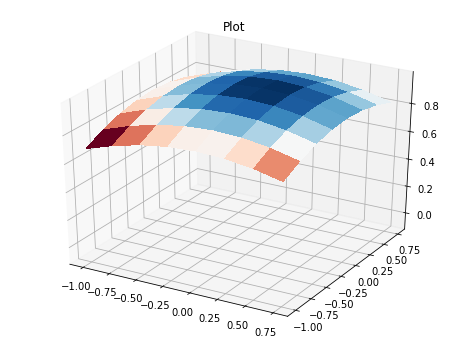

In [38]:
# Now, do some computations with the gridded data and plot a funky shape
EPS=1.0E-4
r = np.sqrt(X**2 + Y**2) + EPS
Z = np.sin(r)/r

# Import 3D Matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(8,6))

# Have to generate a 3D plot using matplotlib's `customizable` methods

# Get current axes (plt.gca) and set projection
ax = fig.gca(projection='3d')

# Make a surface plot
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', antialiased=False)
ax.set_zlim(-0.1, 1.00)
ax.set_title("Plot")

# Exercise #2
Change the x and y dimensions to +/- 8 . What does the figure look like?

---

## More reshape and flatten

In [39]:
# Reshape a vector to a 3D array

# created two 2D arrays of size 3 rows by 5 columns
a = np.arange(30).reshape((2,3,5))
print("a := np.arange(30).reshape((2,3,5)) :\n{0}\n".format(a))

a := np.arange(30).reshape((2,3,5)) :
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]



In [40]:
# Flatten a multi-dimensional array
b = a.flatten(order='C')
print("b := np.flatten(a,order='C') :\n{0}\n".format(b))

b := np.flatten(a,order='C') :
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]



In [41]:
#NumPy arrays have many properties including the type of data contained in them

# For example, an array of integers vs. an array of floats...
a = np.arange(20).reshape(4,5)
b = np.arange(20.).reshape(4,5)

print("a := np.arange(20).reshape((4,5)) :\n{0}\n".format(a))
print("b := np.arange(20.).reshape((4,5)) :\n{0}\n".format(b))

a := np.arange(20).reshape((4,5)) :
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

b := np.arange(20.).reshape((4,5)) :
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]]



---

## Review of indexing and slicing

In [42]:
# Generate some data
a = np.random.random((5,5))
print(" a:\n{0}\n".format(a))

# b is a slice of a 
b = a[3:5,3:5]
print(" b:\n{0}\n".format(b))

#Modify b:
b[:,:]=0.0
print(" b:\n{0}\n".format(b))
print(" new a:\n{0}\n".format(a))

 a:
[[0.72126732 0.38127184 0.0052747  0.35094302 0.07765468]
 [0.96348581 0.33838108 0.18748045 0.91208702 0.20748469]
 [0.46697311 0.03179635 0.49716867 0.65112427 0.5827423 ]
 [0.40546301 0.5540898  0.3950406  0.98028316 0.25933681]
 [0.96032102 0.84260355 0.4984726  0.92346141 0.6996346 ]]

 b:
[[0.98028316 0.25933681]
 [0.92346141 0.6996346 ]]

 b:
[[0. 0.]
 [0. 0.]]

 new a:
[[0.72126732 0.38127184 0.0052747  0.35094302 0.07765468]
 [0.96348581 0.33838108 0.18748045 0.91208702 0.20748469]
 [0.46697311 0.03179635 0.49716867 0.65112427 0.5827423 ]
 [0.40546301 0.5540898  0.3950406  0.         0.        ]
 [0.96032102 0.84260355 0.4984726  0.         0.        ]]



---

## Logical Operations with Arrays

The `np.where` function provides simple ways to define the elements of arrays that meet certain conditions. If the condition is `true` then the index values are returned.

In [43]:
print('Press > 500 hPa:\n', slc_snd[:,0]>500)

# Which index values for presssure in the slc_snd array are greater than 500 hPa?
high_p = np.where(slc_snd[:,0]>500.)
print("\nIndex values of high_p:\n{0}\n".format(high_p))

Press > 500 hPa:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]

Index values of high_p:
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64),)



In [44]:
# So, what are those values of pressure greater than 500 hPa?
p_vals = slc_snd[high_p,0]
print(p_vals)

[[875.  854.  850.  820.  817.3 794.  786.3 756.2 727.1 700.  681.  669.
  645.1 637.  611.  594.4 579.  557.  548.  546.9 540.  534.  528.  514.
  505. ]]


What if we want to know when the winds are greater than 15 knots below 500 hPa?

    pres_500_wind_15 = np.where((slc_snd[:,0]>500.) and (slc_snd[:,7]> 15))

This would result in an error!...(try it)

In [45]:
# Uncomment to try this and look at the error
#pres_500_wind_15 = np.where((slc_snd[:,0]>500.) and (slc_snd[:,7]> 15))

#### ☝🏻 Use Boolean logic to get around that error

Look at the first `np.where` statement (high_p) and see it returned indexes for where the condintion was `True`.

Now consider the following: **Boolean arrays can be multiplied and added**.
    
- _Boolean multiplication_ is equivalent to **`and`**
    - True x True = True
    - True x False = False
    - False x False = False
- _Boolean addition_ is equivalent to **`or`**
    - True + True = True
    - True + False = True
    - False + False = False
    

In [46]:
high_Pressure = slc_snd[:,0] > 500
high_Temperature = slc_snd[:,7] > 15

both = high_Pressure * high_Temperature
print(both)

pres_values = slc_snd[np.where(both), 0]
temp_values = slc_snd[np.where(both), 7]

for i in range(len(pres_values)):
    print(pres_values[i], '\t', temp_values[i])

[False False False False False False False False  True False False False
 False False False  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[727.1 594.4 579.  557.  548.  546.9 540.  534.  528.  514.  505. ] 	 [16. 16. 17. 19. 20. 20. 20. 21. 21. 21. 22.]


In [47]:
# Alternativley...more conndensed...
p_500_w_15 = np.where( (slc_snd[:,0]>500.) * (slc_snd[:,7]> 15) )

print(" Index values of high_p and high wind speed:\n{0}\n".format(p_500_w_15))
print(slc_snd[p_500_w_15,0],slc_snd[p_500_w_15,7])

 Index values of high_p and high wind speed:
(array([ 8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], dtype=int64),)

[[727.1 594.4 579.  557.  548.  546.9 540.  534.  528.  514.  505. ]] [[16. 16. 17. 19. 20. 20. 20. 21. 21. 21. 22.]]


In [48]:
# There is also a numpy function that does the same thing:
np.logical_and(slc_snd[:,0]>500., slc_snd[:,7]> 15)

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

---

## Masked array module

What if we wanted to plot only the levels in our sounding where the winds are greater than 15 mph?

Masks cover things so they can't be seen, and so **masked arrays** contain values identified to not be used in calculations or in plots.

More commonly, we might have data that has unrealistic values and we want to not use those in calculations

First, import the masked submodule `ma` from numpy.

In [49]:
# import masked array submodule from numpy
import numpy.ma as ma

In [50]:
# find all the elements with winds < 15 knots
w_l15 =  slc_snd[:,7]< 15
print(w_l15)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


In [51]:
# Mask the pressure values when there where winds greater than 15 knots...
p_w_l15 = ma.array(slc_snd[:,0], mask=w_l15)
print(p_w_l15)

# and mask the corresponding wind values...
w_w_l15 = ma.array(slc_snd[:,7],mask = w_l15)
print(w_w_l15)

[-- -- -- -- -- -- -- -- 727.1 -- -- -- -- -- 611.0 594.4 579.0 557.0
 548.0 546.9 540.0 534.0 528.0 514.0 505.0 500.0 488.0 470.0 460.8 449.0
 433.0 405.0 400.0 389.0 369.5 341.0 324.0 300.0 298.0 294.4 268.0 250.0
 226.0 219.0 205.0 200.0 195.0 189.0 185.2 172.0 168.5 167.0 160.0 150.0
 147.0 139.3 132.8 132.0 131.0 130.0 127.0 126.0 124.0 120.8 120.0 115.2
 109.8 107.0 104.7 100.0 94.5 82.6 82.3 80.6 75.4 74.7 72.2 71.2 70.0 67.8
 66.0 64.8 64.1 63.5 58.9 58.6 56.3 -- -- -- -- -- -- -- 43.9 43.5 39.8
 38.2 35.8 34.5 31.3 30.0 29.6 28.7 27.4 27.1 25.9 22.4 21.7 20.4 20.0
 19.1 16.9 16.8 15.1 14.3 12.5 11.5 10.6]
[-- -- -- -- -- -- -- -- 16.0 -- -- -- -- -- 15.0 16.0 17.0 19.0 20.0 20.0
 20.0 21.0 21.0 21.0 22.0 22.0 20.0 17.0 15.0 16.0 18.0 20.0 21.0 21.0
 20.0 23.0 24.0 27.0 28.0 27.0 29.0 30.0 32.0 33.0 34.0 35.0 34.0 32.0
 31.0 46.0 53.0 52.0 49.0 45.0 43.0 36.0 46.0 47.0 47.0 48.0 50.0 51.0
 53.0 55.0 54.0 45.0 35.0 30.0 26.0 33.0 30.0 21.0 21.0 24.0 35.0 36.0
 31.0 29.0 28.0 33.

**^ Notice the `--` fields in the array, which are the masked, or hidden, values.**

(0, 70)

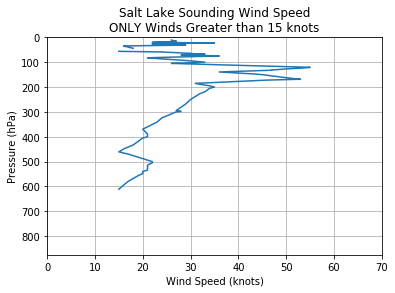

In [52]:
# OK, let's plot the levels with higher winds only
plt.plot(w_w_l15,p_w_l15)
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Pressure (hPa)')
plt.title('Salt Lake Sounding Wind Speed\nONLY Winds Greater than 15 knots')
plt.grid()

#want pressure to decrease with height
plt.ylim([875,0])
plt.xlim([0,70])

# Exercise #3
Plot the potential temperature (theta) as a function of height _only_ when the relative humidity is greater than 40%.

---
<br><br><br><br>

# Extra Reference Material
---

## Saving/Loading Numpy Arrays

To save arrays for other Python programs, the numpy.save and numpy.load are available

In [53]:
#save the sounding array to a binary file
np.save('slc_snd_file',slc_snd)

In [54]:
# make sure the file slc_snd_file.npy was created in your directory

In [55]:
# load that array back in to a new array
sounding_array=np.load('slc_snd_file.npy')

In [56]:
# are they the same?
diff_true = np.where(sounding_array - slc_snd)
print(diff_true)

(array([], dtype=int64), array([], dtype=int64))


---

## Error Handling

Often, you might get errors when you are trying to complete a script. If you know what to do if an error occurs, you can use the `try`, `except`, and `finally` blocks to handle the errors.

Say we want to add two numbers together, but sometimes the data will be expressed a string "NO DATA". In that case, we will get an error when trying to adda string to a number. (obviously there are other ways to do this, but this is just and example.)

    try:
        [try this code]
    except:
        [if that code doesn't work, do this instead]
        
    try:
        [try this code]
    finally:
        [this code happens no matter what]

In [57]:
# A list of lists, with some bad data
a = [[1,2],
     [3,4],
     [5,'NO DATA'],
     [7,8]]

In [58]:
for i in a:
    print(np.sum(i))
    # This results in an error

3
7


TypeError: cannot perform reduce with flexible type

In [59]:
# To handle the error appropriately
for i in a:
    try:
        print(np.sum(i))
    except:
        print('>>MISSING DATA!')

3
7
>>MISSING DATA!
15


In [60]:
# If you want to simply skip over the error, you can use the `pass` command
for i in a:
    try:
        print(np.sum(i))
    except:
        pass

3
7
15


# JSON formatted data from MesoWest API
For those interested in accessing MesoWest data, you can access it easily through the API which returns data in JSON format. https://synopticlabs.org/api/

Signup and get your own API key and token: https://synopticlabs.org/api/signup/

Read the docs to learn about the different types of requests you can make.

In [61]:
URL = 'https://api.synopticlabs.org/v2/stations/timeseries?&token=demotoken&start=201801010000&end=201801011200&stid=wbb,mtmet&vars=air_temp'
import requests
data = requests.get(URL).json()

In [62]:
# explore the JSON file by looking at the keys() and items in the lists
print(data.keys())

dict_keys(['UNITS', 'QC_SUMMARY', 'STATION', 'SUMMARY'])


In [63]:
len(data['STATION'])

2

In [64]:
data['STATION'][0].keys()

dict_keys(['STATUS', 'MNET_ID', 'PERIOD_OF_RECORD', 'ELEVATION', 'NAME', 'STID', 'SENSOR_VARIABLES', 'ELEV_DEM', 'LONGITUDE', 'STATE', 'OBSERVATIONS', 'RESTRICTED', 'QC_FLAGGED', 'LATITUDE', 'TIMEZONE', 'ID'])

In [65]:
data['STATION'][0]['OBSERVATIONS'].keys()

dict_keys(['date_time', 'air_temp_set_1'])

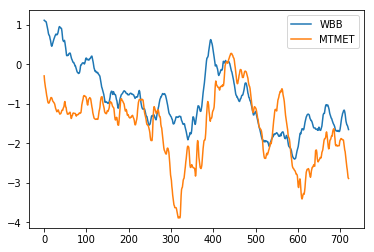

In [66]:
plt.plot(data['STATION'][0]['OBSERVATIONS']['air_temp_set_1'], label=data['STATION'][0]['STID'])
plt.plot(data['STATION'][1]['OBSERVATIONS']['air_temp_set_1'], label=data['STATION'][1]['STID'])
plt.legend()